**Lógica Fuzzy(difusa ou nebulosa)**

https://youtu.be/EnfSJZU4MCU?si=KsZkzOCF2SuwMcXs

- lógica tradicional booleana de predicados - true e false.
- fuzzy: adaptação da lógica tradicional para lidar com mais de 2 valores, descritos por linguagens humanas.

**Grau de pertinência(grade of membership)**
valor de [0,1] que representa quanto um valor pertence a um conjunto ou range de valores

Três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação

In [ ]:
# Instação dos pacotes
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=2257ec22d20dcfe3a0bc17f546274efa5506cd280639b4f2f61bed23a567f63f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


***Fuzzificação***

Nessa fase vamos definir
1. Análise do Problema
2. Definição das Variáveis
3. Definição das Funções de pertinência
4. Criação das Regiões

**Análise do Problema**

Sistema fuzzy para modelar a eficiência do adubo organomineral analizando as quantidades de Nitrogênio(N), Fósforo(P), Potássio(K) e Umidade do Solo(Hu).
* Variáveis de Entrada:
  * Nitrogênio:
      * Universo: [0, 20]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Fósforo:
      * Universo: [0, 30]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Potássio:
      * Universo: [0, 20]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
  * Umidade do Solo:
      * Universo: [0, 50]%
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes
* Variáveis de Saída:
  * Proporção_NPK
      * Universo: [1, 1.5, 2]
      * Funções de Pertinência: Insuficiente, Flores e Frutos, Plantas Grandes

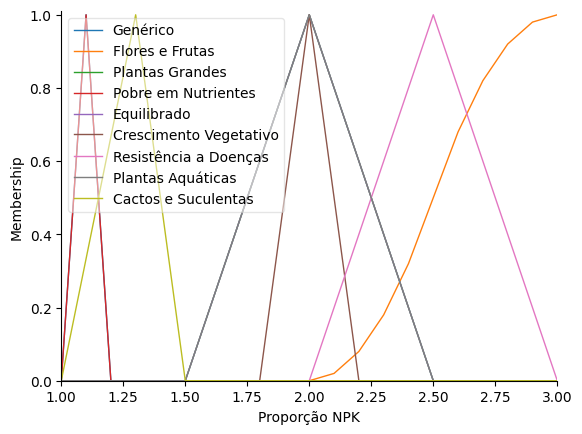

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
nitrogenio = ctrl.Antecedent(np.arange(0, 21, 1), "Nitrogênio")
fosforo = ctrl.Antecedent(np.arange(0, 21, 1), "Fósforo")
potassio = ctrl.Antecedent(np.arange(0, 21, 1), "Potássio")
umidade = ctrl.Antecedent(np.arange(0, 51, 1), "Umidade do Solo")
proporcao_np = ctrl.Consequent(np.arange(1, 3.1, 0.1), "Proporção NPK")
ph_solo = ctrl.Consequent(np.arange(0, 14, 0.1), "pH do Solo")
cra = ctrl.Consequent(np.arange(0, 100, 1), "Capacidade de Retenção de Água")
ce = ctrl.Consequent(np.arange(0, 5, 0.1), "Condutividade Elétrica")
mo = ctrl.Consequent(np.arange(0, 100, 1), "Teor de Matéria Orgânica")
mn = ctrl.Consequent(np.arange(0, 100, 1), "Micronutrientes")

# Criando as funções de pertinência para o Nitrogênio
nitrogenio['baixo'] = fuzz.trapmf(nitrogenio.universe, [0, 0, 7, 8])
nitrogenio['médio'] = fuzz.trimf(nitrogenio.universe, [8, 10, 12])
nitrogenio['elevado'] = fuzz.trapmf(nitrogenio.universe, [12, 15, 20, 20])

# Criando as funções de pertinência para o Fósforo
fosforo['baixo'] = fuzz.trapmf(fosforo.universe, [0, 0, 5, 8])
fosforo['médio'] = fuzz.trimf(fosforo.universe, [8, 10, 12])
fosforo['elevado'] = fuzz.smf(fosforo.universe, 11, 15)

# Criando as funções de pertinência para o Potássio
potassio['baixo'] = fuzz.trimf(potassio.universe, [0, 5, 8])
potassio['médio'] = fuzz.gaussmf(potassio.universe, 10, 1)
potassio['elevado'] = fuzz.trapmf(potassio.universe, [15, 17, 20, 20])

# Criando as funções de pertinência para a Umidade do Solo
umidade['baixo'] = fuzz.trimf(umidade.universe, [0, 10, 15])
umidade['médio'] = fuzz.trimf(umidade.universe, [15, 20, 30])
umidade['elevado'] = fuzz.smf(umidade.universe, 30, 50)

# Criando as funções de pertinência para a Proporção NPK
proporcao_np['Genérico'] = fuzz.trimf(proporcao_np.universe, [1, 1.1, 1.2])
proporcao_np['Flores e Frutas'] = fuzz.smf(proporcao_np.universe, 2, 3)
proporcao_np['Plantas Grandes'] = fuzz.trimf(proporcao_np.universe, [1.5, 2, 2.5])
proporcao_np['Pobre em Nutrientes'] = fuzz.trimf(proporcao_np.universe, [1, 1.1, 1.2])
proporcao_np['Equilibrado'] = fuzz.trimf(proporcao_np.universe, [1.5, 2, 2.5])
proporcao_np['Crescimento Vegetativo'] = fuzz.trimf(proporcao_np.universe, [1.8, 2, 2.2])
proporcao_np['Resistência a Doenças'] = fuzz.trimf(proporcao_np.universe, [2, 2.5, 3])
proporcao_np['Plantas Aquáticas'] = fuzz.trimf(proporcao_np.universe, [1.5, 2, 2.5])
proporcao_np['Cactos e Suculentas'] = fuzz.trimf(proporcao_np.universe, [1, 1.3, 1.5])

# Criando as funções de pertinência para o ph do solo
ph_solo['ácido'] = fuzz.trapmf(ph_solo.universe, [0, 0, 5, 6])
ph_solo['neutro'] = fuzz.trimf(ph_solo.universe, [6, 7, 8])
ph_solo['alcalino'] = fuzz.trapmf(ph_solo.universe, [8, 9, 14, 14])

# Criando as funções de pertinência para Capacidade de Retenção de Água
cra['baixo'] = fuzz.trapmf(cra.universe, [0, 0, 20, 40])
cra['médio'] = fuzz.trimf(cra.universe, [30, 50, 70])
cra['elevado'] = fuzz.trapmf(cra.universe, [60, 80, 100, 100])

# Criando as funções de pertinência para Condutividade Elétrica
ce['baixo'] = fuzz.trapmf(ce.universe, [0, 0, 0.5, 1])
ce['médio'] = fuzz.trimf(ce.universe, [0.5, 1.5, 2.5])
ce['elevado'] = fuzz.trapmf(ce.universe, [2, 3, 5, 5])

# Criando as funções de pertinência para Teor de Matéria Orgânica
mo['baixo'] = fuzz.trapmf(mo.universe, [0, 0, 20, 40])
mo['médio'] = fuzz.trimf(mo.universe, [30, 50, 70])
mo['elevado'] = fuzz.trapmf(mo.universe, [60, 80, 100, 100])

# Criando as funções de pertinência para Micronutrientes
mn['baixo'] = fuzz.trapmf(mn.universe, [0, 0, 20, 40])
mn['médio'] = fuzz.trimf(mn.universe, [30, 50, 70])
mn['elevado'] = fuzz.trapmf(mn.universe, [60, 80, 100, 100])

# nitrogenio.view()
# fosforo.view()
# potassio.view()
# umidade.view()
proporcao_np.view()

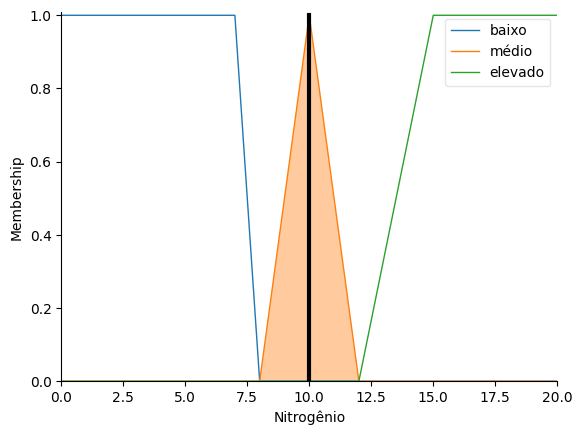

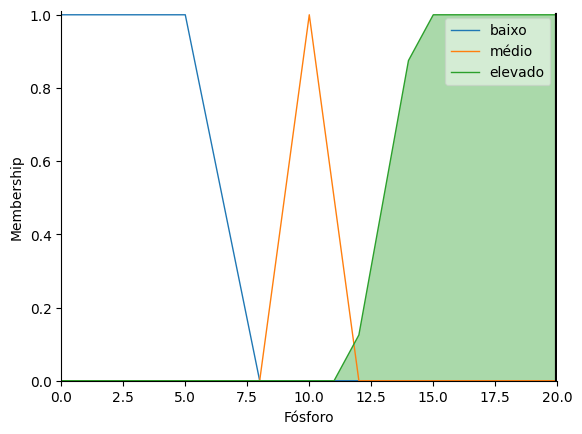

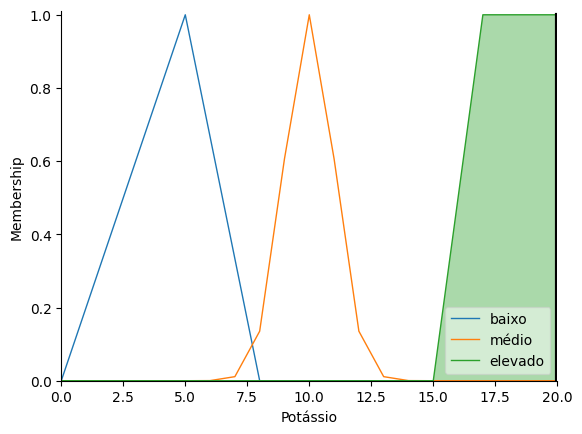

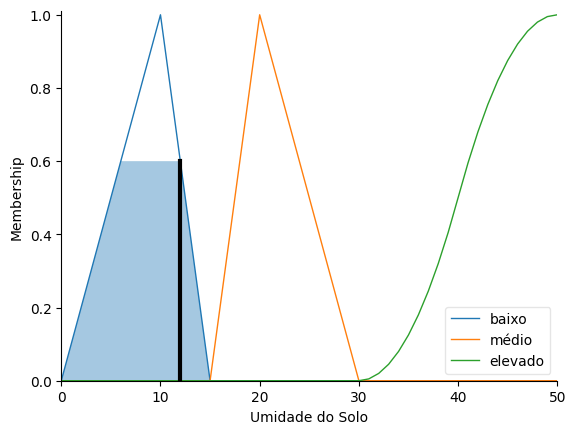

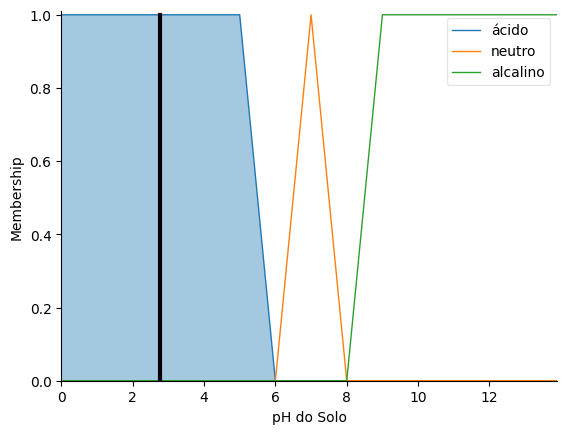

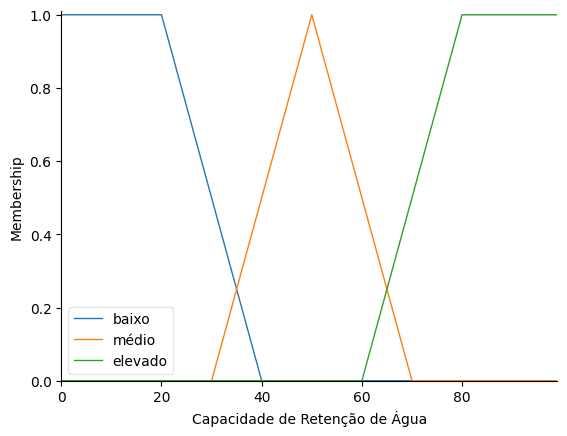

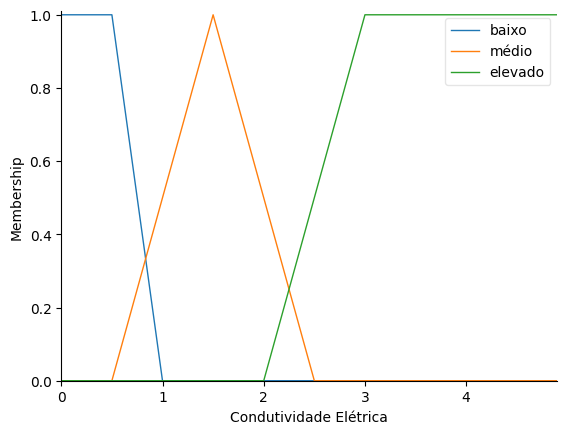

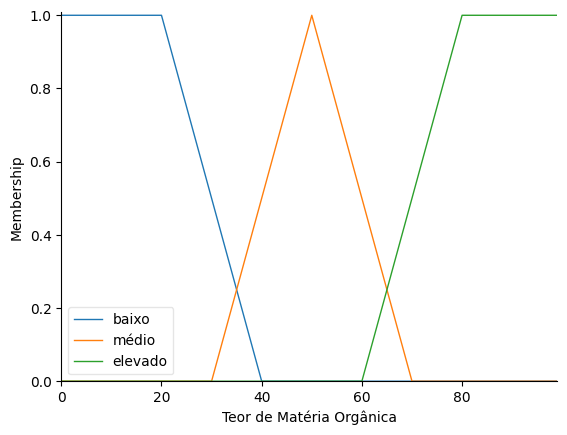

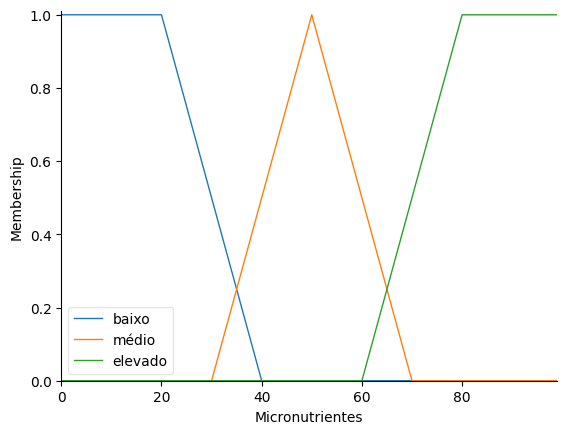

In [ ]:
# Base de Conhecimento/Regras
regra1 = ctrl.Rule(nitrogenio['médio'] & fosforo['médio'], proporcao_np['Genérico'])
regra2 = ctrl.Rule(fosforo['elevado'] & potassio['elevado'], proporcao_np['Flores e Frutas'])
regra3 = ctrl.Rule(nitrogenio['elevado'] & umidade['elevado'] & (fosforo['médio'] | potassio['médio']), proporcao_np['Plantas Grandes'])
regra4 = ctrl.Rule(nitrogenio['baixo'] & fosforo['baixo'] & potassio['baixo'], proporcao_np['Pobre em Nutrientes'])
regra5 = ctrl.Rule(nitrogenio['médio'] & fosforo['médio'] & potassio['médio'] & umidade['médio'], proporcao_np['Equilibrado'])
regra6 = ctrl.Rule(nitrogenio['elevado'] & fosforo['baixo'] & potassio['elevado'], proporcao_np['Crescimento Vegetativo'])
regra7 = ctrl.Rule(fosforo['elevado'] & umidade['baixo'], proporcao_np['Flores e Frutas'])
regra8 = ctrl.Rule(potassio['elevado'] & nitrogenio['baixo'], proporcao_np['Resistência a Doenças'])
regra9 = ctrl.Rule(umidade['elevado'] & fosforo['médio'] & potassio['baixo'], proporcao_np['Plantas Aquáticas'])
regra10 = ctrl.Rule(nitrogenio['baixo'] & umidade['médio'], proporcao_np['Cactos e Suculentas'])

regra11 = ctrl.Rule(proporcao_np['Genérico'], ph_solo['neutro'])
regra12 = ctrl.Rule(proporcao_np['Flores e Frutas'], ph_solo['ácido'])
regra13 = ctrl.Rule(proporcao_np['Plantas Grandes'], ph_solo['alcalino'])



# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10,
                                    regra11, regra12, regra13])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)


mock = [10, # N
        20, # P
        20, # K
        12] # Umidade

validade_simulador.input["Nitrogênio"] = mock[0]
validade_simulador.input["Fósforo"] = mock[1]
validade_simulador.input["Potássio"] = mock[2]
validade_simulador.input["Umidade do Solo"] = mock[3]

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()

# Visualizando os resultados
nitrogenio.view(sim=validade_simulador)
fosforo.view(sim=validade_simulador)
potassio.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)
ph_solo.view(sim=validade_simulador)
cra.view(sim=validade_simulador)
ce.view(sim=validade_simulador)
mo.view(sim=validade_simulador)
mn.view(sim=validade_simulador)

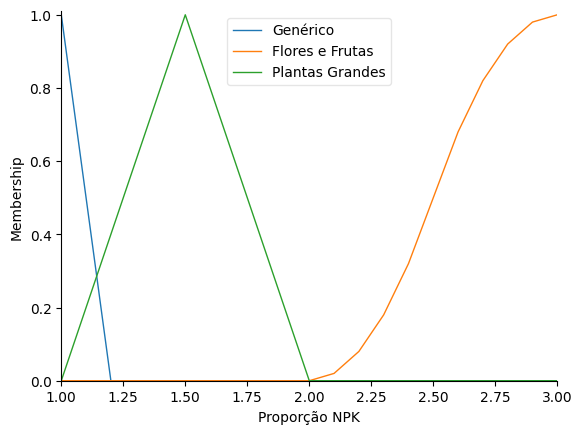

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
nitrogenio = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Nitrogênio")
fosforo = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Fósforo")
potassio = ctrl.Antecedent(np.arange(0, 20 + 1,1), "Potássio")
umidade = ctrl.Antecedent(np.arange(0, 50 + 1, 1), "Umidade do Solo")
proporcao_np = ctrl.Consequent(np.arange(1, 3 + 0.1, 0.1), "Proporção NPK")

# Criando as funções de pertinência para o Nitrogênio
nitrogenio['baixo'] = fuzz.trapmf(nitrogenio.universe, [0, 0, 7, 8])
nitrogenio['médio'] = fuzz.trimf(nitrogenio.universe, [8, 10, 12])
nitrogenio['elevado'] = fuzz.trapmf(nitrogenio.universe, [12, 15, 20, 20])

# Criando as funções de pertinência para o Fósforo
fosforo['baixo'] = fuzz.trapmf(fosforo.universe, [0, 0, 5, 8])
fosforo['médio'] = fuzz.trimf(fosforo.universe, [8, 10, 12])
fosforo['elevado'] = fuzz.smf(fosforo.universe, 11, 15)

# Criando as funções de pertinência para o Potássio
potassio['baixo'] = fuzz.trimf(potassio.universe, [0, 5, 8])
potassio['médio'] = fuzz.gaussmf(potassio.universe, 10, 0.5)
potassio['elevado'] = fuzz.trapmf(potassio.universe, [10, 15, 20, 20])

# Criando as funções de pertinência para a Umidade do Solo
umidade['baixo'] = fuzz.trimf(umidade.universe, [0, 10, 15])
umidade['médio'] = fuzz.trimf(umidade.universe, [15, 20, 30])
umidade['elevado'] = fuzz.smf(umidade.universe, 30, 50)

# Criando as funções de pertinência para a Proporção NPK
proporcao_np['Genérico'] = fuzz.trimf(proporcao_np.universe, [1, 1, 1.2])
proporcao_np['Flores e Frutas'] = fuzz.smf(proporcao_np.universe, 2, 3)
proporcao_np['Plantas Grandes'] = fuzz.trimf(proporcao_np.universe, [1, 1.5, 2])

# nitrogenio.view()
# fosforo.view()
# potassio.view()
# umidade.view()
proporcao_np.view()

**Inferência Fuzzy**

- Definição das regras, que serão processadas paralelamente
- Criação da região resultante
* Base de Conhecimento/Regras
  * regra para cenario generico
  * regra para plantação de frutas
  * regra para plantação de árvores grandes

**Defuzzificação**
- Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.


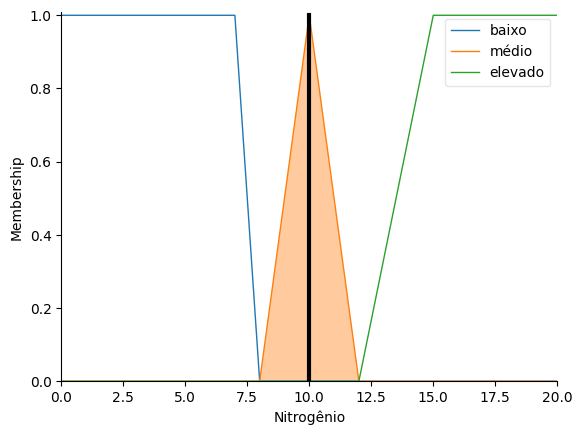

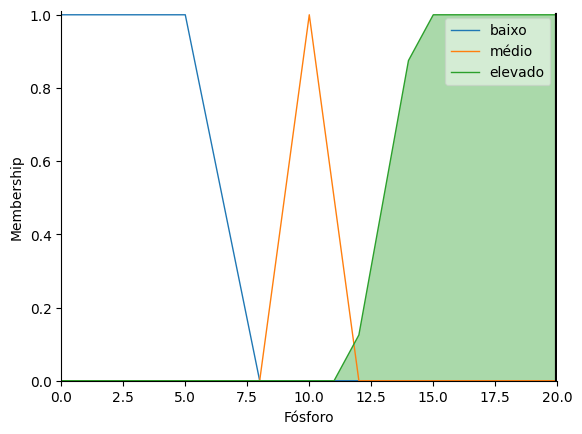

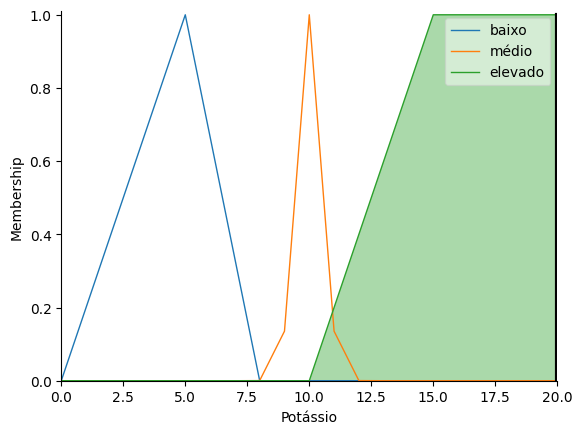

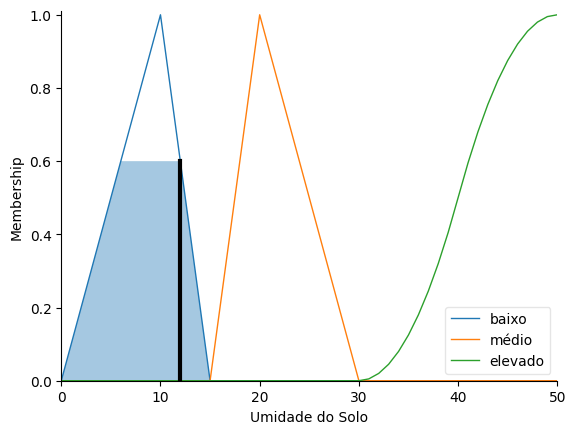

In [ ]:
# Base de Conhecimento/Regras
regra1 = ctrl.Rule(nitrogenio['médio'] & fosforo['médio'], proporcao_np['Genérico'] )
regra2 = ctrl.Rule(fosforo['elevado'] & potassio['elevado'], proporcao_np['Flores e Frutas'])
regra3 = ctrl.Rule(nitrogenio['elevado'] & umidade['elevado'] & (fosforo['médio'] | potassio['médio']), proporcao_np['Plantas Grandes'])

# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)

mock = [10, # N
        20, # P
        20, # K
        12] #Umidade

validade_simulador.input["Nitrogênio"] = mock[0]
validade_simulador.input["Fósforo"] = mock[1]
validade_simulador.input["Potássio"] = mock[2]
validade_simulador.input["Umidade do Solo"] = mock[3]

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
nitrogenio.view(sim=validade_simulador)
fosforo.view(sim=validade_simulador)
potassio.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)